<a href="https://colab.research.google.com/github/aslanidze/Machine_Learning/blob/main/Clus_K_Means_Customer_random_seed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# %matplotlib inline

# **k-Means on a randomly generated dataset**

First we need to set a random seed. Use numpy's random.seed() function, where the seed will be set to 0.

In [2]:
np.random.seed(0)

In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

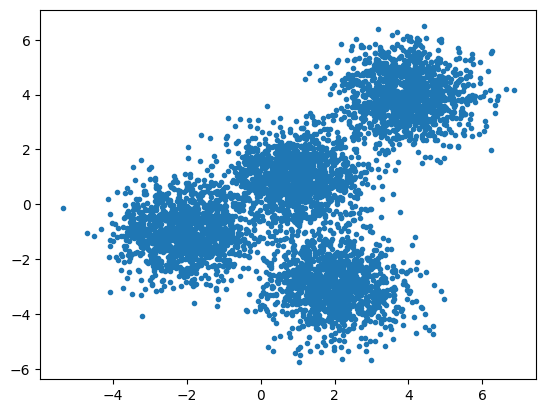

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, X .

In [6]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 1, 0, 0], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers .

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-0.81152989, -0.16873354],
       [ 3.70310165,  3.69627302],
       [ 2.01727265, -2.93823415]])

# Creating the Visual Plot

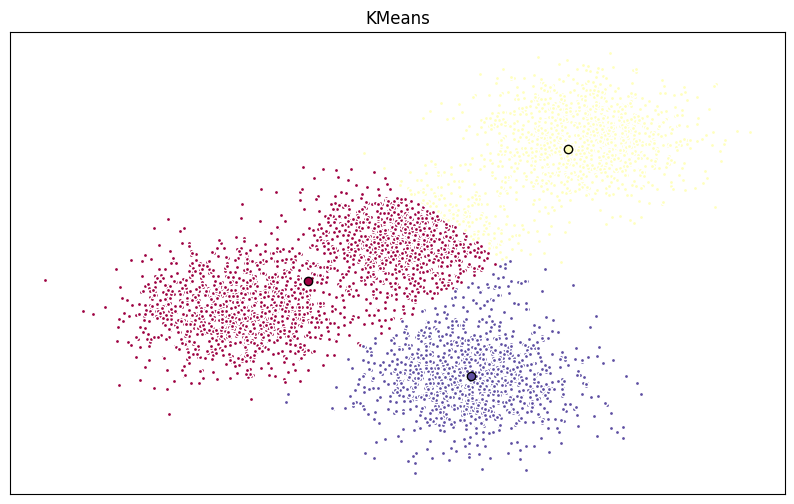

In [9]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(10, 6))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[-1.99025056, -1.06295457],
       [ 4.00130768,  3.9898029 ],
       [ 0.97468147,  1.02839633]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()